# Importing Libraries

In [1]:
import os

import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow.keras.backend as K
# Audio Processing
import librosa 
import librosa.display

# to play the audio files
from IPython.display import Audio
plt.style.use('seaborn-white')
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
## Data Preparation
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import pickle
# Modelling
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization, AveragePooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

## Importing Datasets

In [2]:
TESS = "datasets/TESS/"
RAV = "datasets/RAVDESS/"
SAVEE = "datasets/SAVEE/"
CREMA = "datasets/CREMA/"

### SAVEE

In [3]:
# Get the data location for SAVEE
dir_list = os.listdir(SAVEE)

# parse the filename to get the emotions
emotion=[]
path = []
for i in dir_list:
    if i[-8:-6]=='_a':
        emotion.append('angry')
    elif i[-8:-6]=='_d':
        emotion.append('disgust')
    elif i[-8:-6]=='_f':
        emotion.append('fear')
    elif i[-8:-6]=='_h':
        emotion.append('happy')
    elif i[-8:-6]=='_n':
        emotion.append('neutral')
    elif i[-8:-6]=='sa':
        emotion.append('sad')
    elif i[-8:-6]=='su':
        emotion.append('surprise')
    else:
        emotion.append('unknown') 
    path.append(SAVEE + i)

# Now check out the label count distribution 
SAVEE_df = pd.DataFrame(emotion, columns = ['labels'])
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(path, columns = ['path'])], axis = 1)
print('SAVEE dataset')
SAVEE_df.head()

SAVEE dataset


,labels,path
0,angry,datasets/SAVEE/DC_a01.wav
1,angry,datasets/SAVEE/DC_a02.wav
2,angry,datasets/SAVEE/DC_a03.wav
3,angry,datasets/SAVEE/DC_a04.wav
4,angry,datasets/SAVEE/DC_a05.wav


### TESS

In [4]:
# Get the data location for TESS
path = []
emotion = []
dir_list = os.listdir(TESS)

for i in dir_list:
    fname = os.listdir(TESS + i)   
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('neutral')                                
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('surprise')               
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('sad')
        else:
            emotion.append('Unknown')
        path.append(TESS + i + "/" + f)

TESS_df = pd.DataFrame(emotion, columns = ['labels'])
#TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['path'])],axis=1)
print('TESS dataset')
TESS_df.head()

TESS dataset


,labels,path
0,angry,datasets/TESS/OAF_angry/OAF_back_angry.wav
1,angry,datasets/TESS/OAF_angry/OAF_bar_angry.wav
2,angry,datasets/TESS/OAF_angry/OAF_base_angry.wav
3,angry,datasets/TESS/OAF_angry/OAF_bath_angry.wav
4,angry,datasets/TESS/OAF_angry/OAF_bean_angry.wav


### RAVDESS

In [5]:
# Importing datas from RAVDESS
dir = os.listdir(RAV)

males = []
females = [] 
        
for actor in dir:
       
    files = os.listdir(RAV + actor)
        
    for file in files: 
        part = file.split('.')[0]
        part = part.split("-")           
            
        temp = int(part[6])        
                
        if part[2] == '01':
            emotion = 'neutral'
        elif part[2] == '02':
            emotion = 'calm'
        elif part[2] == '03':
            emotion = 'happy'
        elif part[2] == '04':
            emotion = 'sad'
        elif part[2] == '05':
            emotion = 'angry'
        elif part[2] == '06':
            emotion = 'fear'
        elif part[2] == '07':
            emotion = 'disgust'
        elif part[2] == '08':
            emotion = 'surprise'
        else:
            emotion = 'unknown'
            
        if temp%2 == 0:
            path = (RAV + actor + '/' + file)
            #emotion = 'female_'+emotion
            females.append([emotion, path]) 
        else:
            path = (RAV + actor + '/' + file)
             #emotion = 'male_'+emotion
            males.append([emotion, path])   
    
   
RavFemales_df = pd.DataFrame(females)
RavFemales_df.columns = ['labels', 'path']

RavMales_df = pd.DataFrame(males)
RavMales_df.columns = ['labels', 'path']

print('RAVDESS datasets')
RavFemales_df.head()

RAVDESS datasets


,labels,path
0,neutral,datasets/RAVDESS/Actor_02/03-01-01-01-01-01-02...
1,neutral,datasets/RAVDESS/Actor_02/03-01-01-01-01-02-02...
2,neutral,datasets/RAVDESS/Actor_02/03-01-01-01-02-01-02...
3,neutral,datasets/RAVDESS/Actor_02/03-01-01-01-02-02-02...
4,calm,datasets/RAVDESS/Actor_02/03-01-02-01-01-01-02...


In [6]:
RavMales_df.head()

,labels,path
0,neutral,datasets/RAVDESS/Actor_01/03-01-01-01-01-01-01...
1,neutral,datasets/RAVDESS/Actor_01/03-01-01-01-01-02-01...
2,neutral,datasets/RAVDESS/Actor_01/03-01-01-01-02-01-01...
3,neutral,datasets/RAVDESS/Actor_01/03-01-01-01-02-02-01...
4,calm,datasets/RAVDESS/Actor_01/03-01-02-01-01-01-01...


### CREMA

In [7]:
files = os.listdir(CREMA)

female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]
males = []
females = []

for file in files: 
    part = file.split('_')   
    
    if part[2] == 'SAD':
        emotion = 'sad'
    elif part[2] == 'ANG':
        emotion = 'angry'
    elif part[2] == 'DIS':
        emotion = 'disgust'
    elif part[2] == 'FEA':
        emotion = 'fear'
    elif part[2] == 'HAP':
        emotion = 'happy'
    elif part[2] == 'NEU':
        emotion = 'neutral'  
    else:
        emotion = 'unknown'
        
    if int(part[0]) in female:
        path = (CREMA + '/' + file)
        #emotion = 'female_'+emotion
        females.append([emotion, path]) 
    else:
        path = (CREMA + '/' + file)
        #emotion = 'male_'+emotion
        males.append([emotion, path])   
    
CremaFemales_df = pd.DataFrame(females)
CremaFemales_df.columns = ['labels', 'path']

CremaMales_df = pd.DataFrame(males)
CremaMales_df.columns = ['labels', 'path']
    
print('CREMA datasets')
CremaFemales_df.head()

CREMA datasets


,labels,path
0,angry,datasets/CREMA//1002_DFA_ANG_XX.wav
1,disgust,datasets/CREMA//1002_DFA_DIS_XX.wav
2,fear,datasets/CREMA//1002_DFA_FEA_XX.wav
3,happy,datasets/CREMA//1002_DFA_HAP_XX.wav
4,neutral,datasets/CREMA//1002_DFA_NEU_XX.wav


In [8]:
# Now lets merge all the dataframe
Males = pd.concat([SAVEE_df, RavMales_df, CremaMales_df], axis = 0)
Males.to_csv("males_emotions_df.csv", index = False)

Females = pd.concat([TESS_df, RavFemales_df, CremaFemales_df], axis = 0)
Females.to_csv("females_emotions_df.csv", index = False)

# Data Visualization

In [9]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    plt.colorbar()

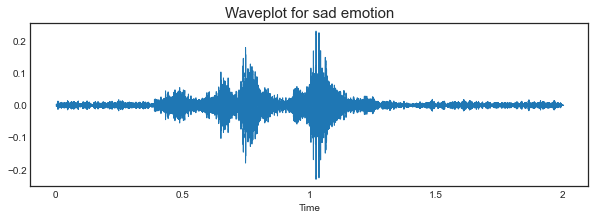

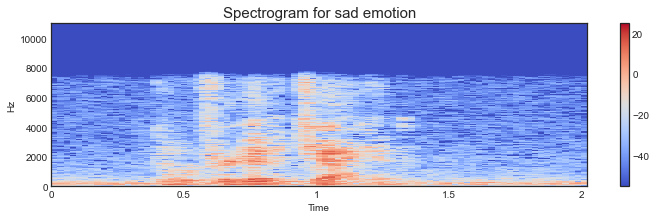

In [10]:
Crema_df = CremaMales_df

emotion='sad'
path = np.array(Crema_df.path[Crema_df.labels==emotion])[0]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

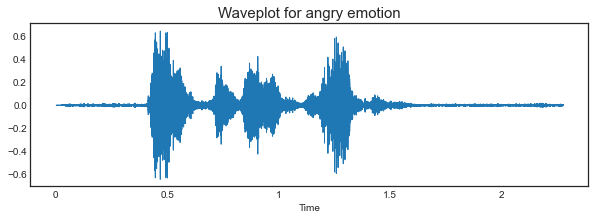

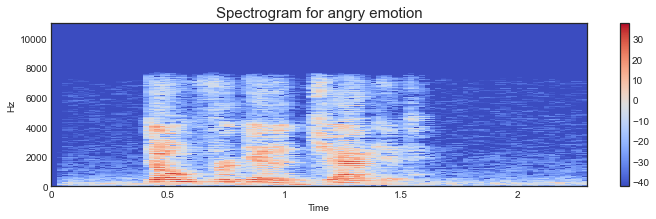

In [11]:
emotion='angry'
path = np.array(Crema_df.path[Crema_df.labels==emotion])[0]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

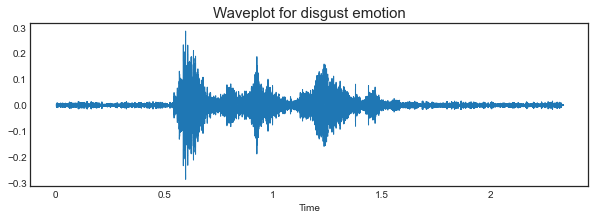

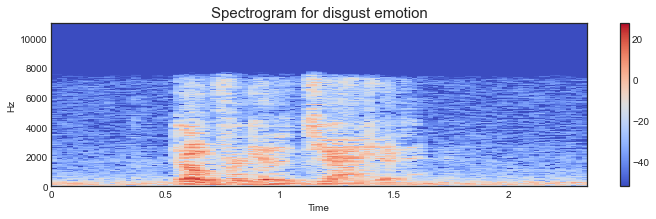

In [12]:
emotion='disgust'
path = np.array(Crema_df.path[Crema_df.labels==emotion])[0]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

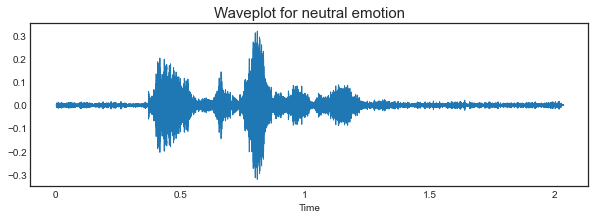

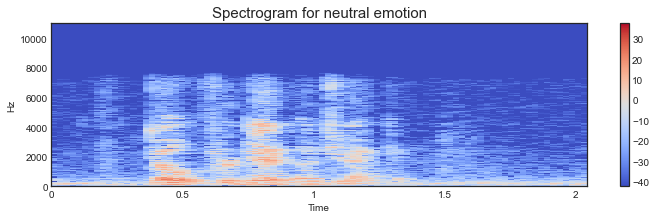

In [13]:
emotion='neutral'
path = np.array(Crema_df.path[Crema_df.labels==emotion])[0]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

### Data Augmentation

In [14]:
def noise(data):
    noise_amp = 0.04*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.70):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.8):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

def higher_speed(data, speed_factor = 1.25):
    return librosa.effects.time_stretch(data, speed_factor)

def lower_speed(data, speed_factor = 0.75):
    return librosa.effects.time_stretch(data, speed_factor)

### Feature Extraction

In [15]:
#sample_rate = 22050

def extract_features(data):
    
    result = np.array([])
    
    #mfccs = librosa.feature.mfcc(y=data, sr=22050, n_mfcc=42) #42 mfcc so we get frames of ~60 ms
    mfccs = librosa.feature.mfcc(y=data, sr=22050, n_mfcc=58)
    mfccs_processed = np.mean(mfccs.T,axis=0)
    result = np.array(mfccs_processed)
     
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=3, offset=0.5, res_type='kaiser_fast') 
    
    #without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    #noised
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    #stretched
    stretch_data = stretch(data)
    res3 = extract_features(stretch_data)
    result = np.vstack((result, res3))
    
    #shifted
    shift_data = shift(data)
    res4 = extract_features(shift_data)
    result = np.vstack((result, res4))
    
    #pitched
    pitch_data = pitch(data, sample_rate)
    res5 = extract_features(pitch_data)
    result = np.vstack((result, res5)) 
    
    #speed up
    higher_speed_data = higher_speed(data)
    res6 = extract_features(higher_speed_data)
    result = np.vstack((result, res6))
    
    #speed down
    lower_speed_data = higher_speed(data)
    res7 = extract_features(lower_speed_data)
    result = np.vstack((result, res7))
    
    return result

In [16]:
female_X, female_Y = [], []
for path, emotion in zip(Females.path, Females.labels):
    features = get_features(path)
    #adding augmentation, get_features return a multi dimensional array (for each augmentation), so we have to use a loop to fill the df
    for elem in features: 
        female_X.append(elem)        
        female_Y.append(emotion)

male_X, male_Y = [], []
for path, emotion in zip(Males.path, Males.labels):
    features = get_features(path)
    for elem in features:
        male_X.append(elem)
        male_Y.append(emotion)
    
print(f'Check shapes:\nFemale features: {len(female_X)}, labels: {len(female_Y)}\nMale features:   {len(male_X)}, labels: {len(male_Y)}')

Check shapes:
Female features: 49224, labels: 49224
Male features:   35910, labels: 35910


In [17]:
def setup_dataframe(gender, features, labels):
    df = pd.DataFrame(features)
    df['labels'] = labels
    df.to_csv(f'{gender}_features.csv', index=False)
    
    print(f'{gender} dataframe')
    df.sample(frac=1).head()
    
    return df

In [18]:
Females_Features = setup_dataframe('Female', female_X, female_Y)
Males_Features = setup_dataframe('Male', male_X, male_Y)

Female dataframe
Male dataframe


### Data Preparation 

In [19]:
female_X = Females_Features.iloc[: ,:-1].values
female_Y = Females_Features['labels'].values

male_X = Males_Features.iloc[: ,:-1].values
male_Y = Males_Features['labels'].values

In [20]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()

female_Y = encoder.fit_transform(np.array(female_Y).reshape(-1,1)).toarray()
male_Y = encoder.fit_transform(np.array(male_Y).reshape(-1,1)).toarray()

### Splitting Data

In [21]:
X = np.concatenate((female_X, male_X))
Y = np.concatenate((female_Y, male_Y))

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, test_size=0.20, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((68107, 58), (68107, 8), (17027, 58), (17027, 8))

In [22]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape , x_test.shape , y_test.shape

((68107, 58, 1), (68107, 8), (17027, 58, 1), (17027, 8))

In [23]:
pickle.dump(scaler, open('tk.pkl', 'wb'))

### Modelling

In [24]:
## To check if a system has the necessary GPU resources available to train our large models
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [25]:
# Create a MirroredStrategy.
strategy = tf.distribute.MirroredStrategy()
print('Number of devices: {}'.format(strategy.num_replicas_in_sync))

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
Number of devices: 1


In [26]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    
    return 2*((precision*recall)/(precision+recall+K.epsilon()))



def specificity_m(y_true, y_pred):
    true_negatives = K.sum(K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1 - y_true, 0, 1)))
    specificity = true_negatives / (possible_negatives + K.epsilon())
    return specificity

def sensitivity_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    sensitivity = true_positives / (possible_positives + K.epsilon())
    return sensitivity

# CNN

In [27]:
with strategy.scope():
    
    def build_model(in_shape):
        
        model=Sequential()
        model.add(Conv1D(256, kernel_size=6, strides=1, padding='same', activation='relu', input_shape=(in_shape, 1)))
        model.add(AveragePooling1D(pool_size=4, strides = 2, padding = 'same'))

        model.add(Conv1D(128, kernel_size=6, strides=1, padding='same', activation='relu'))
        model.add(AveragePooling1D(pool_size=4, strides = 2, padding = 'same'))

        model.add(Conv1D(128, kernel_size=6, strides=1, padding='same', activation='relu'))
        model.add(AveragePooling1D(pool_size=4, strides = 2, padding = 'same'))
        model.add(Dropout(0.2))

        model.add(Conv1D(64, kernel_size=6, strides=1, padding='same', activation='relu'))
        model.add(MaxPooling1D(pool_size=4, strides = 2, padding = 'same'))
        
        model.add(Flatten())
        model.add(Dense(units=32, activation='relu'))
        model.add(Dropout(0.3))

        model.add(Dense(units=8, activation='softmax'))
        model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy', f1_score, recall_m, precision_m, specificity_m, sensitivity_m])
          
        return model

In [28]:
def model_build_summary(mod_dim, tr_features, val_features, val_labels):
    model = build_model(mod_dim)
    model.summary()
    
    score = model.evaluate(val_features, val_labels, verbose = 1)
    accuracy = 100*score[1]
    
    return model

In [29]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=4, min_lr=0.000001)

batch_size = 32
n_epochs = 75

In [30]:
total_model = model_build_summary(x_train.shape[1], x_train, x_test, y_test)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 58, 256)           1792      
_________________________________________________________________
average_pooling1d (AveragePo (None, 29, 256)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 29, 128)           196736    
_________________________________________________________________
average_pooling1d_1 (Average (None, 15, 128)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 15, 128)           98432     
_________________________________________________________________
average_pooling1d_2 (Average (None, 8, 128)            0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 128)            0

In [31]:
history = total_model.fit(x_train, y_train, batch_size=batch_size, epochs=n_epochs, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/75
2129/2129 [==============================] - 6s 3ms/step - loss: 1.4144 - accuracy: 0.4323 - f1_score: 0.3203 - recall_m: 0.2115 - precision_m: 0.7528 - specificity_m: 0.9916 - sensitivity_m: 0.2115 - val_loss: 1.1798 - val_accuracy: 0.5323 - val_f1_score: 0.4300 - val_recall_m: 0.2884 - val_precision_m: 0.8805 - val_specificity_m: 0.9944 - val_sensitivity_m: 0.2884
Epoch 2/75
2129/2129 [==============================] - 5s 3ms/step - loss: 1.1884 - accuracy: 0.5267 - f1_score: 0.4492 - recall_m: 0.3150 - precision_m: 0.8152 - specificity_m: 0.9897 - sensitivity_m: 0.3150 - val_loss: 1.0960 - val_accuracy: 0.5682 - val_f1_score: 0.4637 - val_recall_m: 0.3195 - val_precision_m: 0.8778 - val_specificity_m: 0.9937 - val_sensitivity_m: 0.3195
Epoch 3/75
2129/2129 [==============================] - 6s 3ms/step - loss: 1.1200 - accuracy: 0.5547 - f1_score: 0.4806 - recall_m: 0.3457 - precision_m: 0.8148 - specificity_m: 0.9886 - sensitivity_m: 0.3457 - val_loss: 1.0243 - val_accur

2129/2129 [==============================] - 6s 3ms/step - loss: 0.5397 - accuracy: 0.8024 - f1_score: 0.7968 - recall_m: 0.7385 - precision_m: 0.8677 - specificity_m: 0.9839 - sensitivity_m: 0.7385 - val_loss: 0.5629 - val_accuracy: 0.7956 - val_f1_score: 0.7926 - val_recall_m: 0.7394 - val_precision_m: 0.8561 - val_specificity_m: 0.9823 - val_sensitivity_m: 0.7394
Epoch 23/75
2129/2129 [==============================] - 6s 3ms/step - loss: 0.5259 - accuracy: 0.8078 - f1_score: 0.8020 - recall_m: 0.7471 - precision_m: 0.8681 - specificity_m: 0.9838 - sensitivity_m: 0.7471 - val_loss: 0.5350 - val_accuracy: 0.8070 - val_f1_score: 0.8066 - val_recall_m: 0.7592 - val_precision_m: 0.8621 - val_specificity_m: 0.9827 - val_sensitivity_m: 0.7592
Epoch 24/75
2129/2129 [==============================] - 6s 3ms/step - loss: 0.5148 - accuracy: 0.8123 - f1_score: 0.8081 - recall_m: 0.7552 - precision_m: 0.8712 - specificity_m: 0.9841 - sensitivity_m: 0.7552 - val_loss: 0.5239 - val_accuracy: 0.81

2129/2129 [==============================] - 6s 3ms/step - loss: 0.3485 - accuracy: 0.8774 - f1_score: 0.8760 - recall_m: 0.8471 - precision_m: 0.9081 - specificity_m: 0.9878 - sensitivity_m: 0.8471 - val_loss: 0.4546 - val_accuracy: 0.8500 - val_f1_score: 0.8544 - val_recall_m: 0.8288 - val_precision_m: 0.8827 - val_specificity_m: 0.9843 - val_sensitivity_m: 0.8288
Epoch 44/75
2129/2129 [==============================] - 6s 3ms/step - loss: 0.3437 - accuracy: 0.8780 - f1_score: 0.8781 - recall_m: 0.8504 - precision_m: 0.9088 - specificity_m: 0.9878 - sensitivity_m: 0.8504 - val_loss: 0.4419 - val_accuracy: 0.8566 - val_f1_score: 0.8592 - val_recall_m: 0.8324 - val_precision_m: 0.8886 - val_specificity_m: 0.9851 - val_sensitivity_m: 0.8324
Epoch 45/75
2129/2129 [==============================] - 6s 3ms/step - loss: 0.3374 - accuracy: 0.8824 - f1_score: 0.8817 - recall_m: 0.8544 - precision_m: 0.9118 - specificity_m: 0.9882 - sensitivity_m: 0.8544 - val_loss: 0.4514 - val_accuracy: 0.85

2129/2129 [==============================] - 6s 3ms/step - loss: 0.2658 - accuracy: 0.9074 - f1_score: 0.9083 - recall_m: 0.8901 - precision_m: 0.9280 - specificity_m: 0.9901 - sensitivity_m: 0.8901 - val_loss: 0.4442 - val_accuracy: 0.8669 - val_f1_score: 0.8704 - val_recall_m: 0.8504 - val_precision_m: 0.8920 - val_specificity_m: 0.9853 - val_sensitivity_m: 0.8504
Epoch 65/75
2129/2129 [==============================] - 6s 3ms/step - loss: 0.2605 - accuracy: 0.9096 - f1_score: 0.9103 - recall_m: 0.8930 - precision_m: 0.9290 - specificity_m: 0.9902 - sensitivity_m: 0.8930 - val_loss: 0.4321 - val_accuracy: 0.8723 - val_f1_score: 0.8753 - val_recall_m: 0.8566 - val_precision_m: 0.8953 - val_specificity_m: 0.9857 - val_sensitivity_m: 0.8566
Epoch 66/75
2129/2129 [==============================] - 6s 3ms/step - loss: 0.2574 - accuracy: 0.9119 - f1_score: 0.9117 - recall_m: 0.8945 - precision_m: 0.9303 - specificity_m: 0.9904 - sensitivity_m: 0.8945 - val_loss: 0.4396 - val_accuracy: 0.87

In [32]:
# Save Model
total_model.save('models/modelV2.h5')

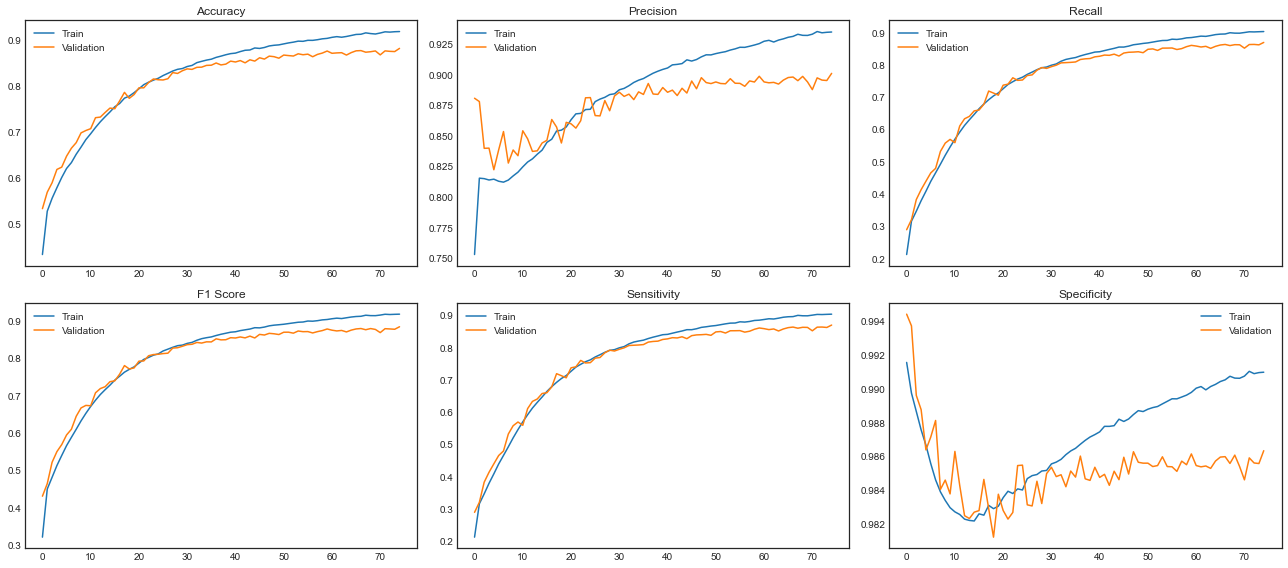

In [33]:


# Extract the metrics from history
train_acc = history.history['accuracy']
train_recall = history.history['recall_m']
train_precision = history.history['precision_m']
train_f1 = history.history['f1_score']
train_sensitivity = history.history['sensitivity_m']
train_specificity = history.history['specificity_m']

val_acc = history.history['val_accuracy']
val_recall = history.history['val_recall_m']
val_precision = history.history['val_precision_m']
val_f1 = history.history['val_f1_score']
val_sensitivity = history.history['val_sensitivity_m']
val_specificity = history.history['val_specificity_m']

# Create a figure and subplot for each metric
fig, axs = plt.subplots(2, 3, figsize=(18, 8))

# Plot accuracy
axs[0, 0].plot(train_acc, label='Train')
axs[0, 0].plot(val_acc, label='Validation')
axs[0, 0].set_title('Accuracy')
axs[0, 0].legend()

# Plot precision
axs[0, 1].plot(train_precision, label='Train')
axs[0, 1].plot(val_precision, label='Validation')
axs[0, 1].set_title('Precision')
axs[0, 1].legend()

# Plot recall
axs[0, 2].plot(train_recall, label='Train')
axs[0, 2].plot(val_recall, label='Validation')
axs[0, 2].set_title('Recall')
axs[0, 2].legend()

# Plot F1 score
axs[1, 0].plot(train_f1, label='Train')
axs[1, 0].plot(val_f1, label='Validation')
axs[1, 0].set_title('F1 Score')
axs[1, 0].legend()

# Plot sensitivity
axs[1, 1].plot(train_sensitivity, label='Train')
axs[1, 1].plot(val_sensitivity, label='Validation')
axs[1, 1].set_title('Sensitivity')
axs[1, 1].legend()

# Plot specificity
axs[1, 2].plot(train_specificity, label='Train')
axs[1, 2].plot(val_specificity, label='Validation')
axs[1, 2].set_title('Specificity')
axs[1, 2].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


In [34]:
a = history.history['accuracy'][-1]
f = history.history['f1_score'][-1]
p = history.history['precision_m'][-1]
r = history.history['recall_m'][-1]


print('Accuracy = ' + str(a * 100))
print('Precision = ' + str(p * 100))
print('F1 Score = ' + str(f * 100))
print('Recall = ' + str(r * 100))

Accuracy = 91.81581735610962
Precision = 93.45621466636658
F1 Score = 91.79763197898865
Recall = 90.24789929389954


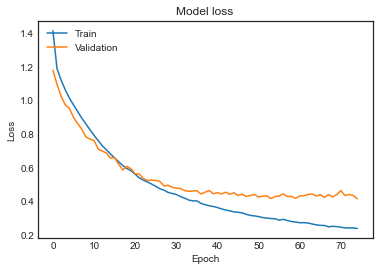

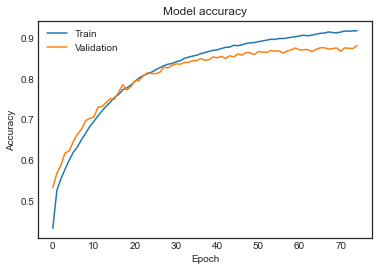

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Decision Tree

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, test_size=0.20, shuffle=True)
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

predictions = clf.predict(x_test)

accuracy = accuracy_score(y_test, predictions)

precision = precision_score(y_test, predictions, average='weighted')

recall = recall_score(y_test, predictions, average='weighted')

f1 = f1_score(y_test, predictions, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.7291
Precision: 0.7293
Recall: 0.7291
F1 Score: 0.7292


# LSTM

In [38]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    
    return 2*((precision*recall)/(precision+recall+K.epsilon()))



def specificity_m(y_true, y_pred):
    true_negatives = K.sum(K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1 - y_true, 0, 1)))
    specificity = true_negatives / (possible_negatives + K.epsilon())
    return specificity

def sensitivity_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    sensitivity = true_positives / (possible_positives + K.epsilon())
    return sensitivity

In [39]:
x_train_reshaped = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test_reshaped = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

model = Sequential()
model.add(LSTM(units=64, input_shape=(x_train_reshaped.shape[1], x_train_reshaped.shape[2])))
model.add(Dense(8))  


model.compile(optimizer = 'adam' , loss = 'mean_squared_error' , metrics = ['accuracy', f1_score, recall_m, precision_m, specificity_m, sensitivity_m]) 

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                16896     
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 520       
Total params: 17,416
Trainable params: 17,416
Non-trainable params: 0
_________________________________________________________________


In [40]:
history = model.fit(x_train_reshaped, y_train, batch_size=batch_size, epochs=n_epochs, validation_data=(x_test_reshaped, y_test), callbacks=[rlrp])

Epoch 1/75
2129/2129 [==============================] - 8s 3ms/step - loss: 0.0860 - accuracy: 0.4087 - f1_score: 0.2823 - recall_m: 0.1798 - precision_m: 0.7988 - specificity_m: 0.9950 - sensitivity_m: 0.1798 - val_loss: 0.0803 - val_accuracy: 0.4534 - val_f1_score: 0.4008 - val_recall_m: 0.2718 - val_precision_m: 0.7975 - val_specificity_m: 0.9900 - val_sensitivity_m: 0.2718
Epoch 2/75
2129/2129 [==============================] - 7s 3ms/step - loss: 0.0761 - accuracy: 0.4926 - f1_score: 0.4138 - recall_m: 0.2797 - precision_m: 0.8385 - specificity_m: 0.9921 - sensitivity_m: 0.2797 - val_loss: 0.0743 - val_accuracy: 0.5049 - val_f1_score: 0.4319 - val_recall_m: 0.2954 - val_precision_m: 0.8338 - val_specificity_m: 0.9916 - val_sensitivity_m: 0.2954
Epoch 3/75
2129/2129 [==============================] - 7s 3ms/step - loss: 0.0728 - accuracy: 0.5215 - f1_score: 0.4451 - recall_m: 0.3076 - precision_m: 0.8418 - specificity_m: 0.9915 - sensitivity_m: 0.3076 - val_loss: 0.0731 - val_accur

2129/2129 [==============================] - 7s 3ms/step - loss: 0.0552 - accuracy: 0.6681 - f1_score: 0.6362 - recall_m: 0.5169 - precision_m: 0.8376 - specificity_m: 0.9857 - sensitivity_m: 0.5169 - val_loss: 0.0589 - val_accuracy: 0.6410 - val_f1_score: 0.6056 - val_recall_m: 0.4839 - val_precision_m: 0.8185 - val_specificity_m: 0.9847 - val_sensitivity_m: 0.4839
Epoch 23/75
2129/2129 [==============================] - 7s 3ms/step - loss: 0.0549 - accuracy: 0.6673 - f1_score: 0.6396 - recall_m: 0.5209 - precision_m: 0.8389 - specificity_m: 0.9856 - sensitivity_m: 0.5209 - val_loss: 0.0578 - val_accuracy: 0.6464 - val_f1_score: 0.6140 - val_recall_m: 0.4964 - val_precision_m: 0.8139 - val_specificity_m: 0.9839 - val_sensitivity_m: 0.4964
Epoch 24/75
2129/2129 [==============================] - 7s 3ms/step - loss: 0.0539 - accuracy: 0.6771 - f1_score: 0.6492 - recall_m: 0.5327 - precision_m: 0.8408 - specificity_m: 0.9855 - sensitivity_m: 0.5327 - val_loss: 0.0578 - val_accuracy: 0.64

2129/2129 [==============================] - 7s 3ms/step - loss: 0.0472 - accuracy: 0.7277 - f1_score: 0.7129 - recall_m: 0.6134 - precision_m: 0.8576 - specificity_m: 0.9854 - sensitivity_m: 0.6134 - val_loss: 0.0545 - val_accuracy: 0.6789 - val_f1_score: 0.6664 - val_recall_m: 0.5735 - val_precision_m: 0.8012 - val_specificity_m: 0.9797 - val_sensitivity_m: 0.5735
Epoch 44/75
2129/2129 [==============================] - 7s 3ms/step - loss: 0.0467 - accuracy: 0.7301 - f1_score: 0.7161 - recall_m: 0.6174 - precision_m: 0.8588 - specificity_m: 0.9855 - sensitivity_m: 0.6174 - val_loss: 0.0531 - val_accuracy: 0.6862 - val_f1_score: 0.6769 - val_recall_m: 0.5819 - val_precision_m: 0.8143 - val_specificity_m: 0.9811 - val_sensitivity_m: 0.5819
Epoch 45/75
2129/2129 [==============================] - 7s 3ms/step - loss: 0.0467 - accuracy: 0.7326 - f1_score: 0.7164 - recall_m: 0.6180 - precision_m: 0.8584 - specificity_m: 0.9854 - sensitivity_m: 0.6180 - val_loss: 0.0549 - val_accuracy: 0.67

2129/2129 [==============================] - 7s 3ms/step - loss: 0.0427 - accuracy: 0.7603 - f1_score: 0.7508 - recall_m: 0.6637 - precision_m: 0.8694 - specificity_m: 0.9858 - sensitivity_m: 0.6637 - val_loss: 0.0519 - val_accuracy: 0.6947 - val_f1_score: 0.6921 - val_recall_m: 0.6052 - val_precision_m: 0.8143 - val_specificity_m: 0.9803 - val_sensitivity_m: 0.6052
Epoch 65/75
2129/2129 [==============================] - 7s 3ms/step - loss: 0.0424 - accuracy: 0.7612 - f1_score: 0.7528 - recall_m: 0.6651 - precision_m: 0.8721 - specificity_m: 0.9861 - sensitivity_m: 0.6651 - val_loss: 0.0529 - val_accuracy: 0.6940 - val_f1_score: 0.6910 - val_recall_m: 0.6132 - val_precision_m: 0.7959 - val_specificity_m: 0.9775 - val_sensitivity_m: 0.6132
Epoch 66/75
2129/2129 [==============================] - 7s 3ms/step - loss: 0.0430 - accuracy: 0.7584 - f1_score: 0.7488 - recall_m: 0.6615 - precision_m: 0.8677 - specificity_m: 0.9856 - sensitivity_m: 0.6615 - val_loss: 0.0505 - val_accuracy: 0.70

In [41]:
model.save('models/lstm.h5')

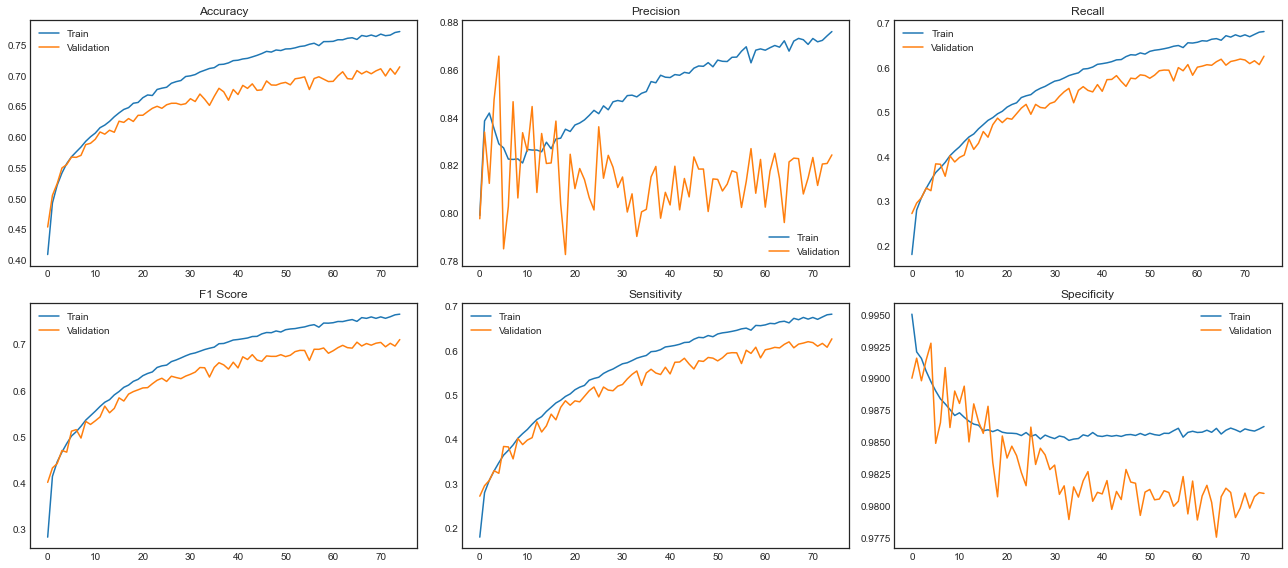

In [42]:


# Extract the metrics from history
train_acc = history.history['accuracy']
train_recall = history.history['recall_m']
train_precision = history.history['precision_m']
train_f1 = history.history['f1_score']
train_sensitivity = history.history['sensitivity_m']
train_specificity = history.history['specificity_m']

val_acc = history.history['val_accuracy']
val_recall = history.history['val_recall_m']
val_precision = history.history['val_precision_m']
val_f1 = history.history['val_f1_score']
val_sensitivity = history.history['val_sensitivity_m']
val_specificity = history.history['val_specificity_m']

# Create a figure and subplot for each metric
fig, axs = plt.subplots(2, 3, figsize=(18, 8))

# Plot accuracy
axs[0, 0].plot(train_acc, label='Train')
axs[0, 0].plot(val_acc, label='Validation')
axs[0, 0].set_title('Accuracy')
axs[0, 0].legend()

# Plot precision
axs[0, 1].plot(train_precision, label='Train')
axs[0, 1].plot(val_precision, label='Validation')
axs[0, 1].set_title('Precision')
axs[0, 1].legend()

# Plot recall
axs[0, 2].plot(train_recall, label='Train')
axs[0, 2].plot(val_recall, label='Validation')
axs[0, 2].set_title('Recall')
axs[0, 2].legend()

# Plot F1 score
axs[1, 0].plot(train_f1, label='Train')
axs[1, 0].plot(val_f1, label='Validation')
axs[1, 0].set_title('F1 Score')
axs[1, 0].legend()

# Plot sensitivity
axs[1, 1].plot(train_sensitivity, label='Train')
axs[1, 1].plot(val_sensitivity, label='Validation')
axs[1, 1].set_title('Sensitivity')
axs[1, 1].legend()

# Plot specificity
axs[1, 2].plot(train_specificity, label='Train')
axs[1, 2].plot(val_specificity, label='Validation')
axs[1, 2].set_title('Specificity')
axs[1, 2].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


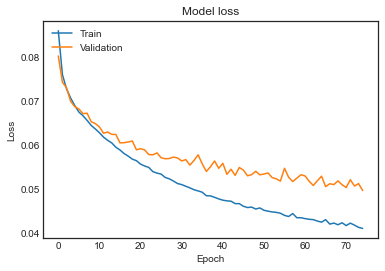

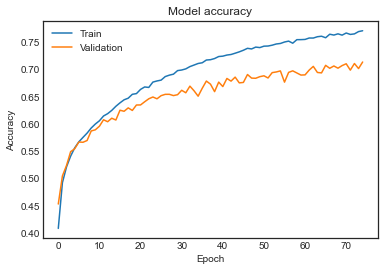

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [44]:
a1 = history.history['accuracy'][-1]
f11 = history.history['f1_score'][-1]
p1 = history.history['precision_m'][-1]
r1 = history.history['recall_m'][-1]


print('Accuracy = ' + str(a1 * 100))
print('Precision = ' + str(p1 * 100))
print('F1 Score = ' + str(f11 * 100))
print('Recall = ' + str(r1 * 100))

Accuracy = 77.12716460227966
Precision = 87.59361505508423
F1 Score = 76.44219398498535
Recall = 68.10349225997925


# Comparison

In [45]:
results ={'Accuracy': [a,accuracy,a1],
 'Recall':[r,recall,r1],
 'Precision': [p,precision,p1],
    'F1' : [f,f1,f11]}
index = ['CNN','Decision Tree','LSTM']

In [46]:
results =pd.DataFrame(results,index=index)
print(results)

               Accuracy    Recall  Precision        F1
CNN            0.918158  0.902479   0.934562  0.917976
Decision Tree  0.729077  0.729077   0.729268  0.729152
LSTM           0.771272  0.681035   0.875936  0.764422


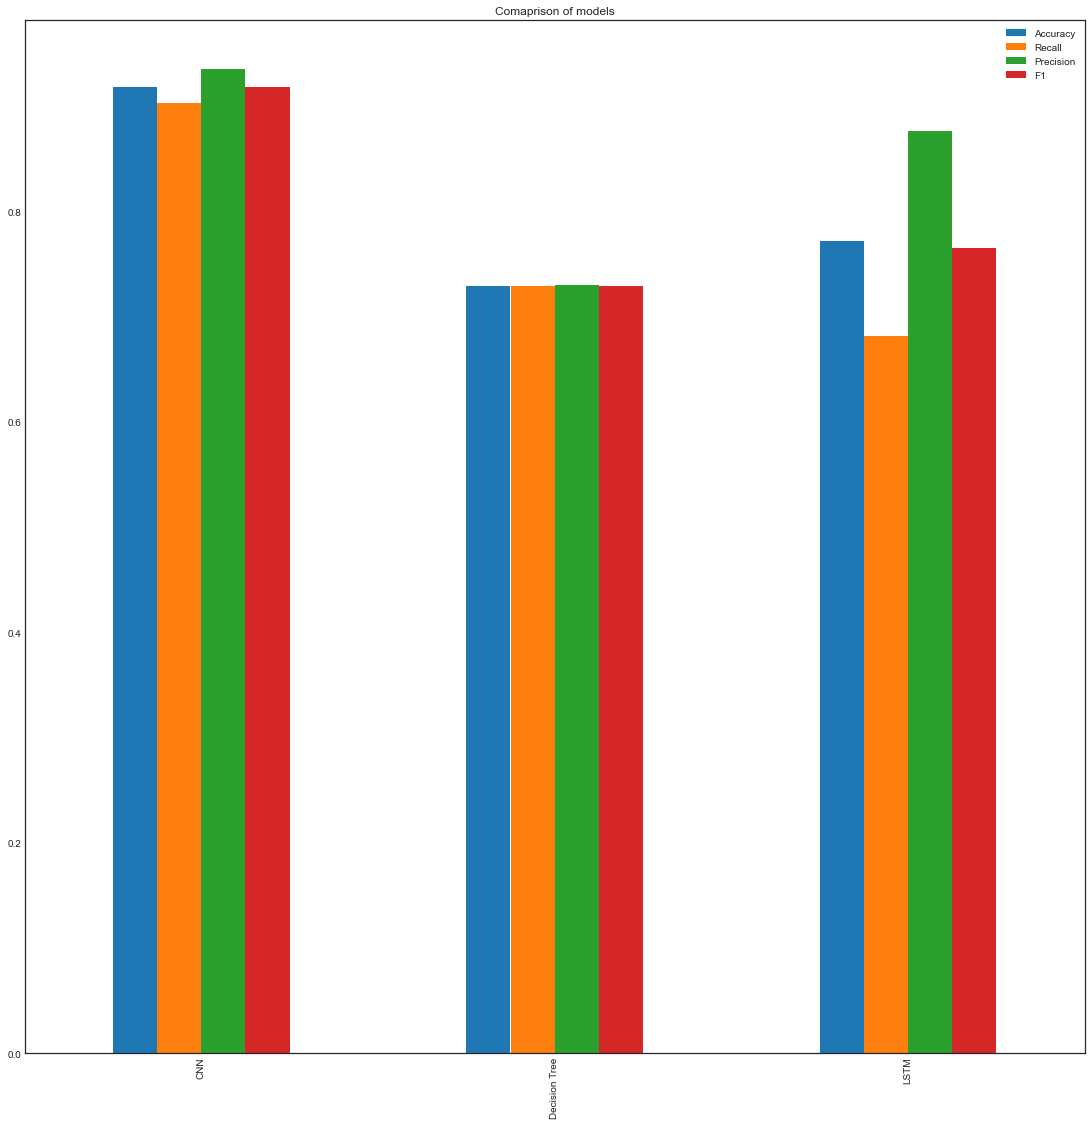

In [47]:
fig =results.plot(kind='bar',title='Comaprison of models',figsize =(19,19)).get_figure()
fig.savefig('Final Result.png')

array([<AxesSubplot:title={'center':'Accuracy'}>,
       <AxesSubplot:title={'center':'Recall'}>,
       <AxesSubplot:title={'center':'Precision'}>,
       <AxesSubplot:title={'center':'F1'}>], dtype=object)

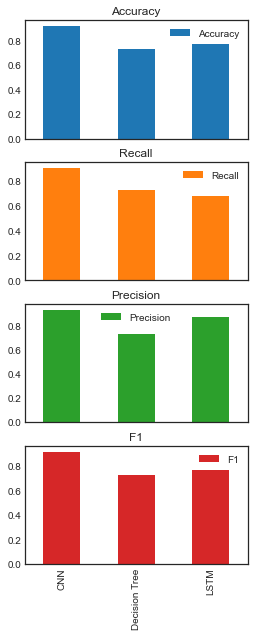

In [48]:
results.plot(subplots=True,kind ='bar',figsize=(4,10))

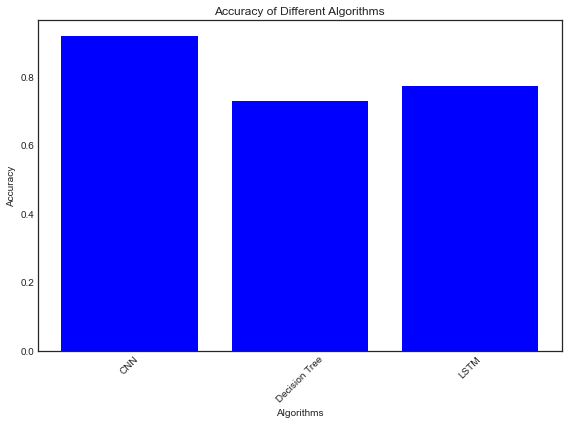

In [49]:
accuracy_values = results['Accuracy']
accuracy_df = pd.DataFrame({'Algorithms': index, 'Accuracy': accuracy_values})

plt.figure(figsize=(8, 6))
plt.bar(accuracy_df['Algorithms'], accuracy_df['Accuracy'], color='blue')
plt.title('Accuracy of Different Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

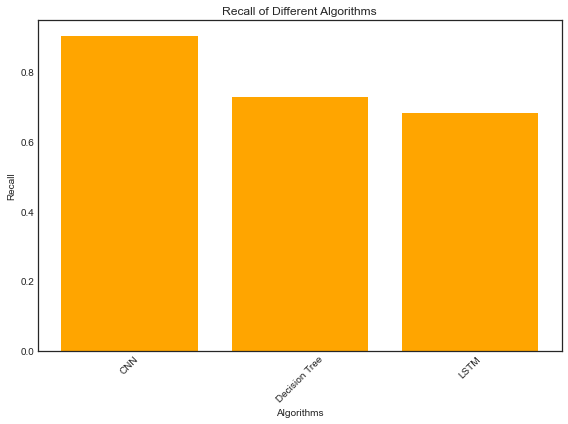

In [50]:
recall_values = results['Recall']
recall_df = pd.DataFrame({'Algorithms': index, 'Recall': recall_values})

plt.figure(figsize=(8, 6))
plt.bar(recall_df['Algorithms'], recall_df['Recall'], color='orange')
plt.title('Recall of Different Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Recall')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

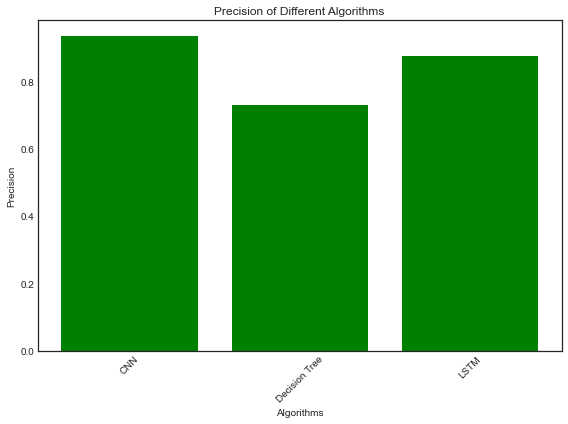

In [51]:
precision_values = results['Precision']
precision_df = pd.DataFrame({'Algorithms': index, 'Precision': precision_values})

plt.figure(figsize=(8, 6))
plt.bar(precision_df['Algorithms'], precision_df['Precision'], color='green')
plt.title('Precision of Different Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Precision')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

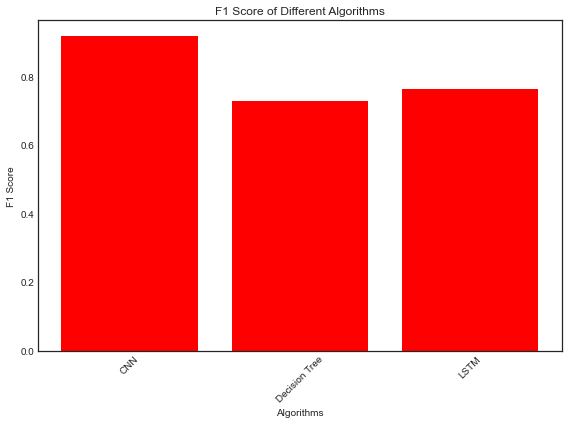

In [52]:
f1_values = results['F1']
f1_df = pd.DataFrame({'Algorithms': index, 'F1 Score': f1_values})

plt.figure(figsize=(8, 6))
plt.bar(f1_df['Algorithms'], f1_df['F1 Score'], color='red')
plt.title('F1 Score of Different Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()